In [1]:
# Tera DataScience e ML - Desafio de inferência
# Importa bibliotecas
import pandas as pd
import numpy as np


In [2]:
# 1. Base de Dados e 2. Tratamento de Dados
# Leitura dos banco de dados
df_demo = pd.read_csv(r"C:\Users\HP\Desktop\2022\tera\desafio_infe\demo_phq.csv")
df_pag_hei =  pd.read_csv(r"C:\Users\HP\Desktop\2022\tera\desafio_infe\pag_hei.csv")

In [3]:
df_demo


,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34,3,4,7.0


In [4]:
# Exibe informações da base
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [135]:
df_pag_hei

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.000000,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.000000,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,41469,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323
9420,41471,951.478060,3.0,2.674192,3.769401,2.198817,0.517369,0.463168,4.662005,5.000000,1.191796,6.145146,3.189620,3.766149,3.974279,7.758940,45.310883
9421,41472,27.713626,1.0,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467
9422,41473,685.912240,3.0,3.907340,5.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,0.000000,7.458058,10.000000,1.676912,2.751168,45.793478


In [5]:
# Tratamento dos dados demo_phq
# Retirar registros nulos
# Verifica a existência de registros nulos
df_demo.isnull()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5330,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5331,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5332,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# Exclui registros nulos
n_df_demo = df_demo.dropna()


In [8]:
# verifica exclusão
n_df_demo

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34,3,4,7.0


In [12]:
# Preencher os campos com 7 ou 9, com a medida <moda>
# Cria lista de features (perguntas)
lista_perguntas = ['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090']
for x in lista_perguntas:
    moda = n_df_demo[x].mode()

    n_df_demo.loc[n_df_demo[x] == 7.0, [x]] = moda
    n_df_demo.loc[n_df_demo[x] == 9.0, [x]] = moda

# Testes realizados
#df_demo['DPQ010'] = np.where(df_demo['DPQ010'] == 7.0, df_demo['DPQ010'].mean())
#df_demo.loc[df_demo['DPQ010'] == 1.0, ['DPQ010']] = 111
#df_demo.loc[n_df_demo[x] == 7.0 | df_demo.loc[df_demo[x] == 9.0, [x]] = moda 
# deu erro de sintaxe com or ou and então fiz indivisual    

In [17]:
n_lista_features=n_df_demo[lista_perguntas]
n_lista_features

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5329,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5330,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0
5331,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Tratamento dos dados pag_hei
# Retirar registros nulos
# Verifica a existência de registros nulos
df_pag_hei.isnull()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9420,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9421,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9422,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
# Exclui registros nulos
n_pag_hei = df_pag_hei.dropna()


In [20]:
# Combina os dois bancos de dados
# opção com pd.concat()
# frames = [df_demo, df_pag_hei]
# result = pd.concat(frames)
# display(result)

# opção com join
result = pd.concat([n_df_demo, n_pag_hei], axis=1, join='inner')
display(result)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.000000,3.176179,3.617204,0.470430,5.657701,5.589008,0.000000,6.473871,5.779322,35.581653
6,31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328,41465,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,0.568990,5.000000,5.000000,10.000000,0.000000,10.000000,10.000000,8.300543,72.102108
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,...,1.346121,5.000000,5.000000,2.523978,2.076821,6.910090,10.000000,5.449394,9.261834,64.635376
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.037803,5.000000,5.000000,7.745917,0.000000,10.000000,10.000000,10.000000,74.065957
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.691079,4.766488,3.356393,4.533039,3.751504,8.682008,10.000000,0.000000,44.179366


In [21]:
# Excluir nulos de result
n_result = result.dropna()
n_result

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.000000,3.176179,3.617204,0.470430,5.657701,5.589008,0.000000,6.473871,5.779322,35.581653
6,31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328,41465,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,0.568990,5.000000,5.000000,10.000000,0.000000,10.000000,10.000000,8.300543,72.102108
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,...,1.346121,5.000000,5.000000,2.523978,2.076821,6.910090,10.000000,5.449394,9.261834,64.635376
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.037803,5.000000,5.000000,7.745917,0.000000,10.000000,10.000000,10.000000,74.065957
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.691079,4.766488,3.356393,4.533039,3.751504,8.682008,10.000000,0.000000,44.179366


In [41]:
# Criação variável phq9 -> escore Patient Health Questionnaire
n_result['phq9'] = n_result['DPQ010'] + n_result['DPQ020'] + n_result['DPQ030'] + n_result['DPQ040'] + n_result['DPQ050']  + n_result['DPQ060']  + n_result['DPQ070']  + n_result['DPQ080']  + n_result['DPQ090']
n_result


C:\Users\HP\AppData\Local\Temp/ipykernel_4484/338658081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_result['phq9'] = n_result['DPQ010'] + n_result['DPQ020'] + n_result['DPQ030'] + n_result['DPQ040'] + n_result['DPQ050']  + n_result['DPQ060']  + n_result['DPQ070']  + n_result['DPQ080']  + n_result['DPQ090']


,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9,phq_grp
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326,0.0,0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,4.0,0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,3.617204,0.470430,5.657701,5.589008,0.000000,6.473871,5.779322,35.581653,6.0,0
6,31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328,41465,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,5.000000,10.000000,0.000000,10.000000,10.000000,8.300543,72.102108,1.0,0
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,...,5.000000,2.523978,2.076821,6.910090,10.000000,5.449394,9.261834,64.635376,10.0,0
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,5.000000,7.745917,0.000000,10.000000,10.000000,10.000000,74.065957,2.0,0
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.766488,3.356393,4.533039,3.751504,8.682008,10.000000,0.000000,44.179366,0.0,0


In [42]:
# Altera nome data frame
df_d = n_result

In [43]:
# transforma coluna phq9 de float para int
df_d['phq9'] = df_d['phq9'].astype(int)

C:\Users\HP\AppData\Local\Temp/ipykernel_4484/4085300919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['phq9'] = df_d['phq9'].astype(int)


In [26]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3329 entries, 1 to 5333
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      3329 non-null   int64  
 1   DPQ010                    3329 non-null   float64
 2   DPQ020                    3329 non-null   float64
 3   DPQ030                    3329 non-null   float64
 4   DPQ040                    3329 non-null   float64
 5   DPQ050                    3329 non-null   float64
 6   DPQ060                    3329 non-null   float64
 7   DPQ070                    3329 non-null   float64
 8   DPQ080                    3329 non-null   float64
 9   DPQ090                    3329 non-null   float64
 10  RIAGENDR                  3329 non-null   int64  
 11  RIDAGEYR                  3329 non-null   int64  
 12  RIDRETH1                  3329 non-null   int64  
 13  DMDEDUC                   3329 non-null   int64  
 14  INDFMINC

In [44]:
# Criar nova coluna com sintoma de acordo com o tipo de resposta da pesquisa
# criando a lista de condições
conditions = [
    (df_d['phq9'] < 5),
    (df_d['phq9'] >= 5) & (df_d['phq9'] < 10),
    (df_d['phq9'] >= 10) & (df_d['phq9'] < 15),
    (df_d['phq9'] >= 15) & (df_d['phq9'] < 19),
    (df_d['phq9'] >= 20)
    ]
# lista de valores para cada condição
values = [0, 1, 2, 3, 4]

# criar nova coluna e usar np.select para apropriar valores
df_d['phq_grp'] = np.select(conditions, values)

df_d.head()


C:\Users\HP\AppData\Local\Temp/ipykernel_4484/2110981573.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['phq_grp'] = np.select(conditions, values)


,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9,phq_grp
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326,0,0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0,0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,4,0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,3.617204,0.470430,5.657701,5.589008,0.000000,6.473871,5.779322,35.581653,6,1
6,31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0,0


In [46]:
# verificar se o campo foi criado de forma correta
verifica_phq_grp = df_d[['phq9','phq_grp']]
verifica_phq_grp[verifica_phq_grp['phq9'] >= 15]
# resultado positivo, o campo foi criado de forma correta

,phq9,phq_grp
165,18,3
192,16,3
222,15,3
406,17,3
424,18,3
...,...,...
4903,15,3
4968,21,4
5239,15,3
5271,15,3


In [114]:
df_d

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9,phq_grp
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326,0,0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0,0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0,0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,3.617204,0.470430,5.657701,5.589008,0.000000,6.473871,5.779322,35.581653,0,0
6,31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328,41465,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,5.000000,10.000000,0.000000,10.000000,10.000000,8.300543,72.102108,0,0
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,...,5.000000,2.523978,2.076821,6.910090,10.000000,5.449394,9.261834,64.635376,0,0
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,5.000000,7.745917,0.000000,10.000000,10.000000,10.000000,74.065957,1,0
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.766488,3.356393,4.533039,3.751504,8.682008,10.000000,0.000000,44.179366,0,0


In [47]:
# 3. Análise univariada
# importa bibliotecas
import statistics
import math
import numpy as np
import seaborn as sns

In [48]:
df_d.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9,phq_grp
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326,0,0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0,0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,4,0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,3.617204,0.470430,5.657701,5.589008,0.000000,6.473871,5.779322,35.581653,6,1
6,31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0,0


In [54]:
# Análise dos  componentes por categoria (saudáveis e nocivos a saúde)
# Criação variável health_food 
df_d['health_food'] = df_d['HEI2015C1_TOTALVEG'] + df_d['HEI2015C3_TOTALFRUIT'] + df_d['HEI2015C5_WHOLEGRAIN'] +  df_d['HEI2015C6_TOTALDAIRY'] +                       df_d['HEI2015C9_FATTYACID']
df_d['n_health_food'] = df_d['HEI2015C10_SODIUM'] + df_d['HEI2015C11_REFINEDGRAIN'] + df_d['HEI2015C12_SFAT'] + df_d['HEI2015C13_ADDSUG']     
n_result
var_X = ['ADHERENCE','health_food','n_health_food', 'phq9', 'phq_grp']
base_analise = df_d[var_X]
base_analise

C:\Users\HP\AppData\Local\Temp/ipykernel_4484/911705029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['health_food'] = df_d['HEI2015C1_TOTALVEG'] + df_d['HEI2015C3_TOTALFRUIT'] + df_d['HEI2015C5_WHOLEGRAIN'] +  df_d['HEI2015C6_TOTALDAIRY'] +                       df_d['HEI2015C9_FATTYACID']
C:\Users\HP\AppData\Local\Temp/ipykernel_4484/911705029.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['n_health_food'] = df_d['HEI2015C10_SODIUM'] + df_d['HEI2015C11_REFINEDGRAIN'] + df_d['HEI2015C1

,ADHERENCE,health_food,n_health_food,phq9,phq_grp
1,2.0,13.585561,21.427877,0,0
3,2.0,11.941150,16.167718,0,0
4,3.0,20.008362,33.543335,4,0
5,1.0,12.334613,17.842201,6,1
6,3.0,12.964994,17.369253,0,0
...,...,...,...,...,...
5328,2.0,24.640825,28.300543,1,0
5330,1.0,18.422942,31.621318,10,2
5331,2.0,26.783720,30.000000,2,0
5332,3.0,10.533177,22.433512,0,0


In [55]:
# calculo da média, mediana e moda
base_analise.mean()

ADHERENCE         2.095524
health_food      15.607457
n_health_food    22.299567
phq9              2.687894
phq_grp           0.277561
dtype: float64

In [56]:
base_analise.median()

ADHERENCE         2.000000
health_food      15.307747
n_health_food    21.861926
phq9              1.000000
phq_grp           0.000000
dtype: float64

In [58]:
# calculo dos medias, desvio padrao e percentis
base_analise.describe()

,ADHERENCE,health_food,n_health_food,phq9,phq_grp
count,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000
mean,2.095524,15.607457,22.299567,2.687894,0.277561
std,0.913577,4.846117,5.949904,3.625776,0.627288
min,1.000000,0.497122,4.376882,0.000000,0.000000
25%,1.000000,12.071712,18.140998,0.000000,0.000000
50%,2.000000,15.307747,21.861926,1.000000,0.000000
75%,3.000000,18.801467,26.134564,4.000000,0.000000
max,3.000000,30.000000,40.000000,26.000000,4.000000


<AxesSubplot:>

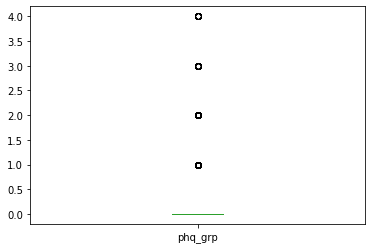

In [59]:
# visualisação gráfica
base_analise.phq_grp.plot(kind = "box")

<AxesSubplot:ylabel='phq_grp'>

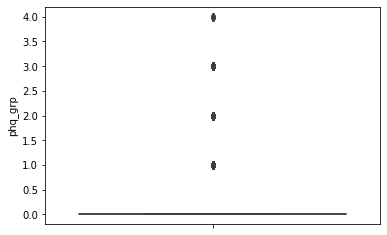

In [60]:
# Usando biblioteca seaborn
sns.boxplot(data=base_analise, y='phq_grp')

In [65]:
# Análise bivariada descritiva por grupode sintomas relacionado com alimentos não saudáveis
base_analise.groupby('phq_grp').n_health_food.describe()

,count,mean,std,min,25%,50%,75%,max
phq_grp,,,,,,,,
0,2649.0,22.295998,5.939310,4.376882,18.137810,21.856577,26.098488,40.000000
1,501.0,22.305198,5.906951,7.875337,18.142211,21.841306,26.161600,40.000000
2,126.0,22.191994,6.333746,4.693810,18.026507,21.756354,25.488728,38.631765
3,41.0,22.900078,6.645250,8.391407,19.194494,23.697537,28.000795,34.454755
4,12.0,21.930037,3.832543,15.145556,19.104272,21.845614,24.860107,26.952297


In [66]:
# Análise bivariada descritiva por grupode sintomas relacionado com alimentos saudáveis
base_analise.groupby('phq_grp').health_food.describe()

,count,mean,std,min,25%,50%,75%,max
phq_grp,,,,,,,,
0,2649.0,15.625498,4.848847,0.497122,12.052188,15.359624,18.810985,30.000000
1,501.0,15.427063,4.849156,2.371192,12.053464,15.151629,18.761478,29.285035
2,126.0,15.933241,4.984335,5.237292,12.882744,15.245707,19.265379,30.000000
3,41.0,16.077156,4.496413,5.618574,13.680826,15.336204,18.999204,25.639688
4,12.0,14.130757,3.844027,6.326747,11.528928,14.713088,18.008301,18.660927


In [67]:
# Análise bivariada descritiva por grupode sintomas relacionado com atividade física
base_analise.groupby('phq_grp').ADHERENCE.describe()

,count,mean,std,min,25%,50%,75%,max
phq_grp,,,,,,,,
0,2649.0,2.092110,0.913462,1.0,1.0,2.0,3.0,3.0
1,501.0,2.133733,0.927405,1.0,1.0,3.0,3.0,3.0
2,126.0,1.952381,0.875051,1.0,1.0,2.0,3.0,3.0
3,41.0,2.292683,0.843917,1.0,2.0,3.0,3.0,3.0
4,12.0,2.083333,0.900337,1.0,1.0,2.0,3.0,3.0


<AxesSubplot:xlabel='phq_grp', ylabel='n_health_food'>

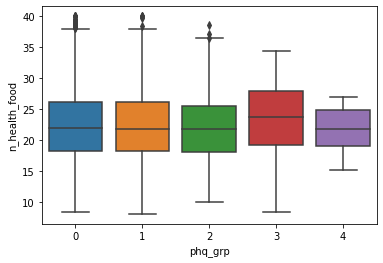

In [70]:
# Análise gráfica dos sintomas relacionadas má alimentacao 
# Analisado consumo acima de 8.000 
sns.boxplot(data=base_analise[base_analise.n_health_food >= 8], y='n_health_food', x='phq_grp')

<AxesSubplot:xlabel='phq_grp', ylabel='ADHERENCE'>

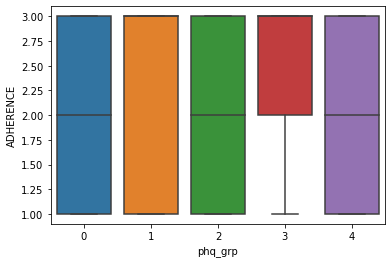

In [72]:
# Análise gráfica dos sintomas relacionadas atividade física
# Analisado consumo acima de 8.000 
sns.boxplot(data=base_analise[base_analise.ADHERENCE < 4], y='ADHERENCE', x='phq_grp')

<AxesSubplot:xlabel='n_health_food', ylabel='Density'>

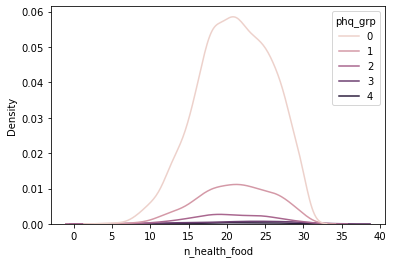

In [73]:
# Análise gráfica dos sintomas relacionadas a alimentação não saudável
sns.kdeplot(data=base_analise[base_analise.n_health_food <= 30], x='n_health_food', hue='phq_grp')

<AxesSubplot:xlabel='health_food', ylabel='Density'>

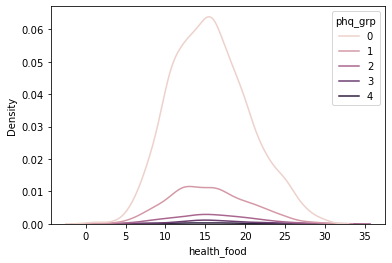

In [74]:
# Análise gráfica dos sintomas relacionadas a alimentação não saudável
sns.kdeplot(data=base_analise[base_analise.health_food <= 30], x='health_food', hue='phq_grp')

<AxesSubplot:xlabel='ADHERENCE', ylabel='Density'>

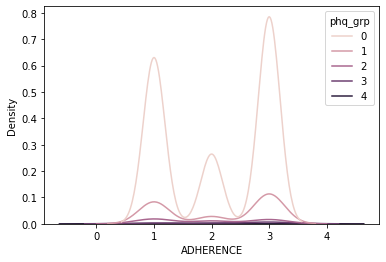

In [76]:
# Análise gráfica dos sintomas relacionadas a atividade física
sns.kdeplot(data=base_analise[base_analise.ADHERENCE<= 4], x='ADHERENCE', hue='phq_grp')

<AxesSubplot:xlabel='phq_grp', ylabel='n_health_food'>

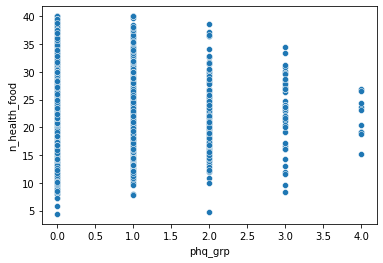

In [80]:
# gráfico para análise da relação entre os sintomas e o tipo de alimento consumido (nao saudável)
sns.scatterplot(data=base_analise[base_analise.n_health_food <= 40],y='n_health_food',x='phq_grp')

<AxesSubplot:xlabel='phq_grp', ylabel='health_food'>

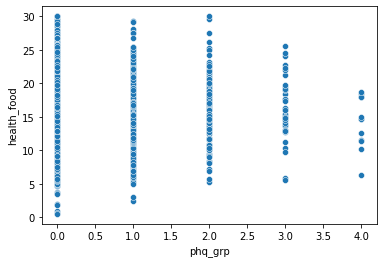

In [79]:
# gráfico para análise da relação entre os sintomas e o tipo de alimento consumido (saudável)
sns.scatterplot(data=base_analise[base_analise.health_food <= 40],y='health_food',x='phq_grp')

<AxesSubplot:xlabel='phq_grp', ylabel='ADHERENCE'>

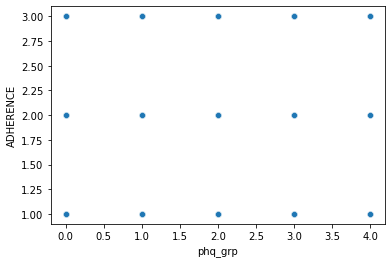

In [82]:
# gráfico para análise da relação entre os sintomas e atividade física
sns.scatterplot(data=base_analise[base_analise.ADHERENCE <= 4],y='ADHERENCE',x='phq_grp')

In [83]:
# 5- Testes de Hipótese
# importa bibliotecas
from random import gauss
from statistics import mean, stdev
import numpy as np
import math 
import scipy.stats as st

In [84]:
# calcula a média amostral dos sintomas
amostra_sintomas = base_analise['phq_grp']
media_amostral = mean(amostra_sintomas)
desvio_populacional = np.sqrt(100) #desvio padrão populacional (raiz da variancia)
n = len(amostra_sintomas)
nivel_confianca = 0.95

print("O tamanho da amostra é de: ", n, "sintomas")
print("A média amostral é: ", media_amostral)

IC_media = st.norm.interval(nivel_confianca, loc=media_amostral, scale=desvio_populacional/np.sqrt(n))

print ("O intervalo de ", nivel_confianca*100,
      "% confiança para a média dos sintomas é de: ", [round(num,2) for num in IC_media])

O tamanho da amostra é de:  3329 sintomas
A média amostral é:  0.27756082907780116
O intervalo de  95.0 % confiança para a média dos sintomas é de:  [-0.06, 0.62]


In [86]:
# Teste de normalidade dos dados
amostra_sintomas = base_analise['phq_grp']
significancia = 0.01 
from scipy.stats import normaltest
stat_test, p_valor = normaltest(amostra_sintomas) #Testando a normalidade dos dados - se p-valor > alfa (5%) os dados possuem dist. normal

print('Teste de normalidade dos dados')

if(p_valor <= significancia):
    print('Rejeitamos a hipótese Nula - Os dados não possuem dist. Normal')
    print('P-valor: ',round(p_valor,2), '> nível de significancia (alfa): ', round(significancia,2))

Teste de normalidade dos dados
Rejeitamos a hipótese Nula - Os dados não possuem dist. Normal
P-valor:  0.0 > nível de significancia (alfa):  0.01


In [91]:
# Teste de Hipótese para avaliar as características demográficas
# Quais são as características apresentam diferenças estatisticamente significativas para a frenquencia 
# de sintomas de depressao
# utiliza sigla df_bad (base analise demografica) para nomear o dataset
var_bad = ['RIAGENDR','RIDAGEYR','RIDRETH1','DMDEDUC','INDFMINC','phq_grp']
df_bad_1 = n_result[var_bad]
df_bad_1

,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,phq_grp
1,2,44,4,4,11.0,0
3,1,73,3,3,12.0,0
4,2,18,2,3,11.0,0
5,1,19,3,4,11.0,1
6,1,21,2,3,3.0,0
...,...,...,...,...,...,...
5328,2,18,4,2,3.0,0
5330,2,66,1,1,8.0,2
5331,1,19,4,4,2.0,0
5332,1,34,3,4,7.0,0


In [92]:
# Exclui registros nulos
df_bad = df_bad_1.dropna()

In [ ]:
#  analise das features
# RIAGENDR-> genero -> qualitativa categórico normal
# RIDAGEYR -> idades -> quantitativa continua
# RIDREDTH1 -> raça -> qualitativa categórico ordinal
# DMDEDUC -> escolaridade -> qualitativo categórico ordinal
# INDFMINC -> Renda familiar -> quantitativo continuo
# phq9 -> Sintoma

In [93]:
# Calculo da média de idade e da renda familiar
df_bad['RIDAGEYR'].mean()

44.70501652147792

In [94]:
df_bad['INDFMINC'].mean()

8.586662661459897

In [95]:
# Calculo da médiana de idade e da renda familiar
df_bad['RIDAGEYR'].median()

42.0

In [96]:
df_bad['INDFMINC'].median()

7.0

In [97]:
# Calculo da moda de idade e renda familiar
statistics.mode(df_bad.RIDAGEYR)

18

In [98]:
statistics.mode(df_bad.INDFMINC)

11.0

In [99]:
# Calculo da amplitude da idade
df_bad['RIDAGEYR'].min()

18

In [100]:
df_bad['RIDAGEYR'].max()

85

In [101]:
# Calculo da amplitude da renda
df_bad['INDFMINC'].min()

1.0

In [102]:
df_bad['INDFMINC'].max()

99.0

In [103]:
# Cálculo da variância de idade e renda
df_bad.RIDAGEYR.var()

393.45863167791117

In [104]:
df_bad.INDFMINC.var()

149.70410090810876

In [105]:
# Cálculo do desvio padrão da idade e renda
df_bad.RIDAGEYR.std()

19.835791682660695

In [106]:
df_bad.INDFMINC.std()

12.235362720741415

In [107]:
# Cálculo dos percentis da idade e renda familiar
np.percentile(df_bad.RIDAGEYR, [25, 50, 75, 95])

array([27., 42., 61., 81.])

In [108]:
np.percentile(df_bad.INDFMINC, [25, 50, 75, 95])

array([ 5.,  7., 10., 11.])

In [109]:
# Análise descritiva da idade e renda familiar
df_bad.RIDAGEYR.describe()

count    3329.000000
mean       44.705017
std        19.835792
min        18.000000
25%        27.000000
50%        42.000000
75%        61.000000
max        85.000000
Name: RIDAGEYR, dtype: float64

In [110]:
df_bad.INDFMINC.describe()

count    3329.000000
mean        8.586663
std        12.235363
min         1.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        99.000000
Name: INDFMINC, dtype: float64

<AxesSubplot:>

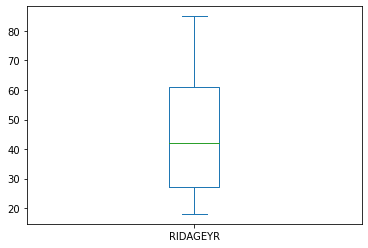

In [111]:
# Visualização gráfica por idade
df_bad.RIDAGEYR.plot(kind = 'box')

<AxesSubplot:ylabel='RIDAGEYR'>

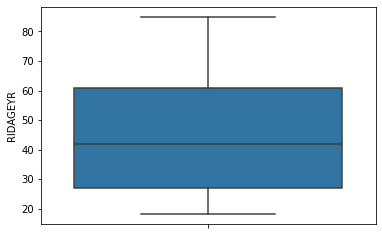

In [112]:
sns.boxplot(data=df_bad, y='RIDAGEYR')

<AxesSubplot:>

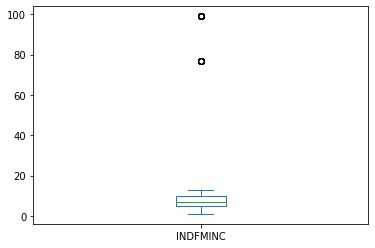

In [113]:
# Visualização gráfica por renda familiar
df_bad.INDFMINC.plot(kind = 'box')

<AxesSubplot:ylabel='INDFMINC'>

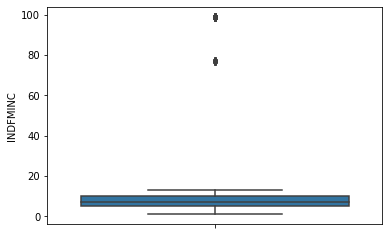

In [114]:
sns.boxplot(data=df_bad, y='INDFMINC')

<AxesSubplot:ylabel='INDFMINC'>

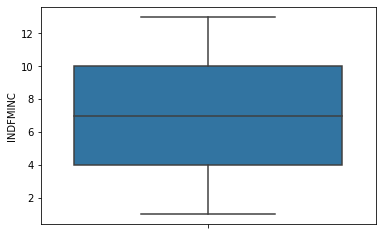

In [115]:
# como a outliers na renda, vamos plotar excluindo renda acima de 60
sns.boxplot(data=df_bad[df_bad.INDFMINC <= 60], y='INDFMINC')

<AxesSubplot:xlabel='RIDAGEYR', ylabel='Count'>

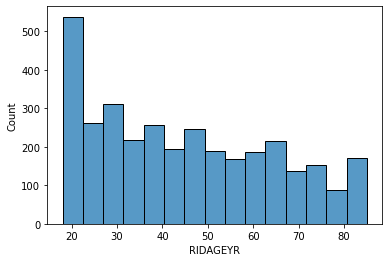

In [116]:
# plotargem de histograma de idade e renda (sem os valores mais altos)
# Idade
sns.histplot(df_bad.RIDAGEYR)

<AxesSubplot:xlabel='INDFMINC', ylabel='Count'>

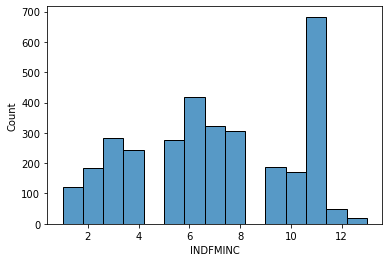

In [117]:
# renda
sns.histplot(data=df_bad[df_bad.INDFMINC <= 60], x='INDFMINC')

<AxesSubplot:xlabel='RIDAGEYR', ylabel='Density'>

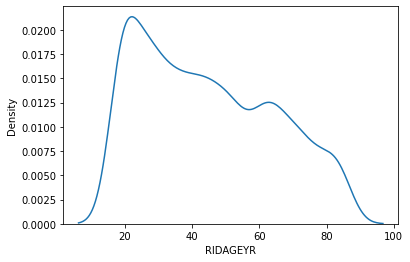

In [118]:
# gráfico de densidade das idades e renda
# Idade
sns.kdeplot(df_bad.RIDAGEYR)

<AxesSubplot:xlabel='INDFMINC', ylabel='Density'>

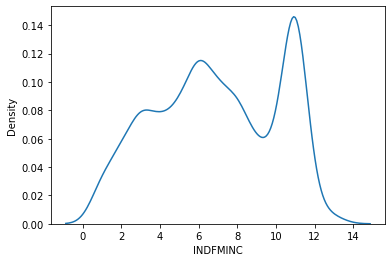

In [119]:
# renda (sem valores mais altos)
sns.kdeplot(data=df_bad[df_bad.INDFMINC <= 60], x='INDFMINC')

In [120]:
# Análise descritiva bivariada por grupo de sintoma com relação a idade
df_bad.groupby('phq_grp').RIDAGEYR.describe()

,count,mean,std,min,25%,50%,75%,max
phq_grp,,,,,,,,
0,2649.0,44.946017,19.998860,18.0,27.0,42.0,62.00,85.0
1,501.0,43.580838,19.556174,18.0,27.0,40.0,59.00,85.0
2,126.0,44.531746,18.448062,18.0,27.0,45.0,58.00,85.0
3,41.0,42.951220,18.319322,18.0,26.0,44.0,56.00,85.0
4,12.0,46.250000,14.200672,19.0,36.0,47.5,59.25,64.0


In [121]:
# Análise descritiva bivariada por grupo de sintoma com relação a renda
df_bad.groupby('phq_grp').INDFMINC.describe()

,count,mean,std,min,25%,50%,75%,max
phq_grp,,,,,,,,
0,2649.0,8.436014,11.091616,1.0,5.00,7.0,11.00,99.0
1,501.0,10.013972,17.135280,1.0,4.00,7.0,10.00,99.0
2,126.0,5.563492,3.287543,1.0,3.00,5.0,8.00,13.0
3,41.0,9.317073,18.405759,1.0,3.00,5.0,8.00,99.0
4,12.0,11.500000,27.602701,1.0,2.75,3.0,5.25,99.0


<AxesSubplot:xlabel='RIDAGEYR', ylabel='Density'>

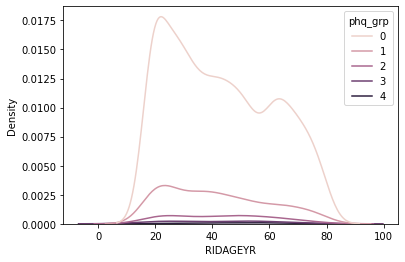

In [122]:
# Análise gráfica de idade e renda
# Idade menor que 80 anos
sns.kdeplot(data=df_bad[df_bad.RIDAGEYR <= 80], x='RIDAGEYR', hue='phq_grp')

<AxesSubplot:xlabel='INDFMINC', ylabel='Density'>

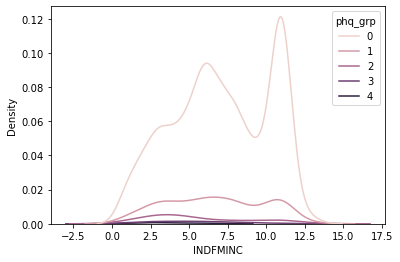

In [123]:
# renda
sns.kdeplot(data=df_bad[df_bad.INDFMINC <= 60], x='INDFMINC', hue='phq_grp')

<AxesSubplot:xlabel='phq_grp', ylabel='INDFMINC'>

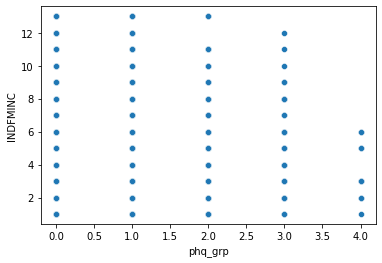

In [124]:
# Gráfico para visualizar a relação entre a renda e os sintomas
sns.scatterplot(data=df_bad[df_bad.INDFMINC <= 60],y='INDFMINC',x='phq_grp')

<AxesSubplot:xlabel='RIDAGEYR', ylabel='INDFMINC'>

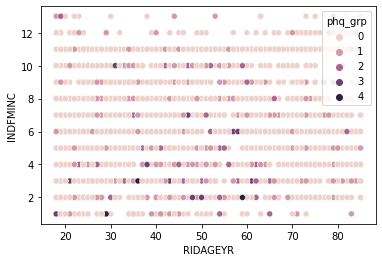

In [125]:
# Gráfico para visualizar a relação entre idade,renda e os sintomas
sns.scatterplot(data=df_bad[df_bad.INDFMINC <= 60],y='INDFMINC',x='RIDAGEYR', hue='phq_grp')

In [ ]:
# 6 - Aspéctos da análise
# 1. pelo estudo do NHANES a análise é experimental, pois, foram realizados tratamentos na variáveis para 
# medir os resultados
# 2. Os fatores de vies encontrados foram as quantidades excessivas de repostas 7 e 9 (ser recusa e não 
# sabe e não sabe responder). Outro vies foram os outliers de idade e renda.
# 3. A partir do estudo podemos afirmar que hábitos saudáveis possuem efeito decisivo na prevenção de depressão
# 4. As fraquesas esta na amostra selecionada com idade de jovens preponderante 
# Nota: ainda faltam realizar analises das features qualitativas (categóricas)
# 5. Poderiam ser colhidas variaveis como: estado civil, possui filhos, "esta trabalhando", uso de drogas
# 6. Assim como tem uma tabela de sintomas de acordo com score das respostas, poderia ter uma tabela de causas
# e efeito, de acordo com o tipo de alimento (saudável e não saudável)
